# Import data wrangling and analytics library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data read and Analysis

In [8]:
trainDf = pd.read_csv('train.csv')
testDf = pd.read_csv('test.csv')

In [9]:
trainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
from pandas_profiling import ProfileReport
ProfileReport(trainDf)

KeyboardInterrupt: 

# Data Cleaning

In [12]:
trainDf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
testDf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
trainDf[trainDf["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
trainDf["Embarked"] = trainDf["Embarked"].fillna("C")
trainDf[trainDf["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
trainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
testDf[testDf["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [18]:
testDf["Fare"] = testDf["Fare"].fillna(np.mean(testDf[testDf["Pclass"] == 3]["Fare"]))
testDf[testDf["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
trainDf.dropna(axis = 1, how = 'any', inplace = True)
trainDf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
testDf.dropna(axis = 1, how = 'any', inplace = True)
testDf.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
trainDf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C


In [22]:
# set the PassengerId as index and drop the variable Name due to unique value 
trainDf.set_index('PassengerId', inplace=True)
trainDf.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [23]:
# set the PassengerId as index and drop the variable Name due to unique value 
testDf.set_index('PassengerId', inplace=True)
testDf.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [24]:
trainDf

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S
888,1,1,female,0,0,30.0000,S
889,0,3,female,1,2,23.4500,S


# Exploratory data analysis (EDA)

<AxesSubplot:xlabel='Sex', ylabel='count'>

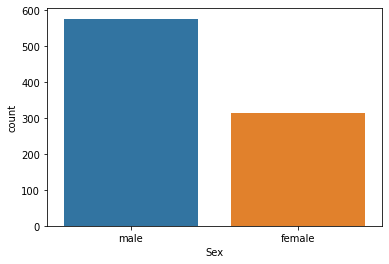

In [25]:
sns.countplot(trainDf['Sex'],  data=trainDf, )

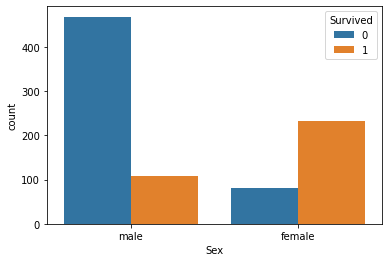

In [26]:
sns.countplot('Sex',hue='Survived',data=trainDf)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

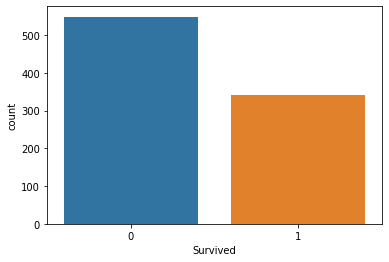

In [27]:
sns.countplot('Survived', data=trainDf)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

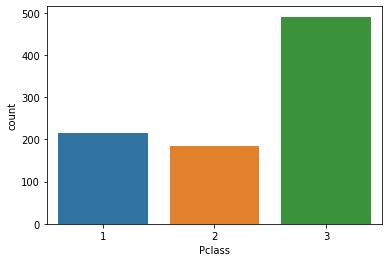

In [28]:
sns.countplot('Pclass', data=trainDf)

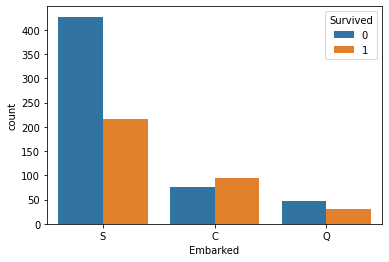

In [29]:
sns.countplot('Embarked',hue='Survived',data=trainDf)
plt.show()

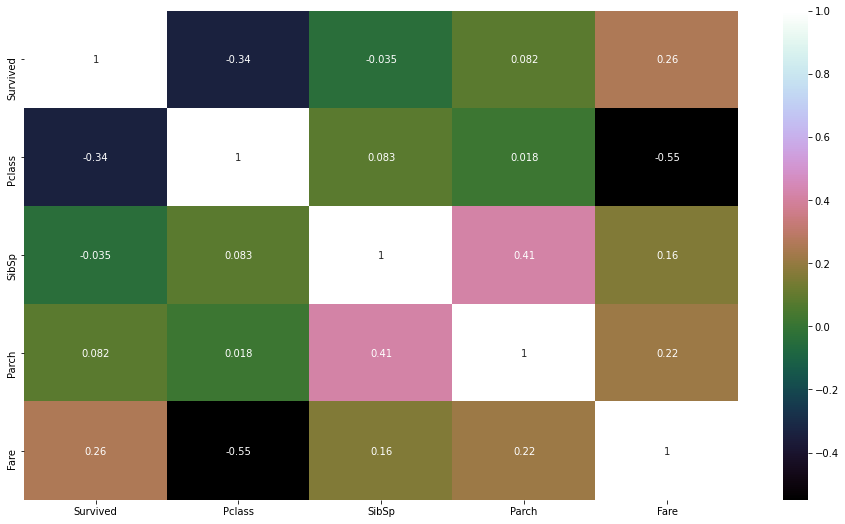

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(trainDf.corr(), annot=True, cmap="cubehelix")
plt.show()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

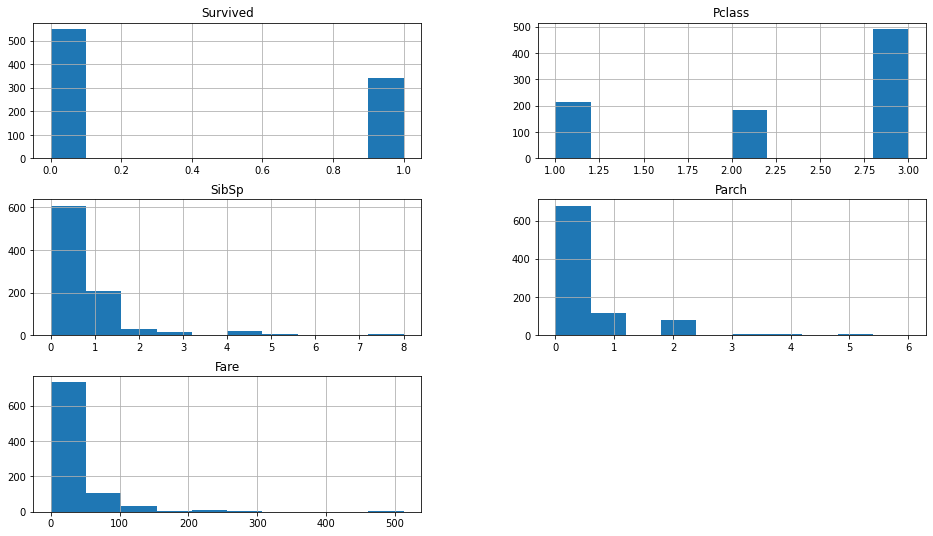

In [31]:
trainDf.hist(figsize=(16,9))

# Data type transformation

In [32]:
trainDf.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
6,0,3,male,0,0,8.4583,Q
7,0,1,male,0,0,51.8625,S
8,0,3,male,3,1,21.0750,S
9,1,3,female,0,2,11.1333,S


In [33]:
testDf.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
892,3,male,0,0,7.8292,Q
893,3,female,1,0,7.0000,S
894,2,male,0,0,9.6875,Q
895,3,male,0,0,8.6625,S
896,3,female,1,1,12.2875,S


In [34]:
le = LabelEncoder()
# dtype transform of train dataset
trainDf.Sex = le.fit_transform(trainDf.Sex)
trainDf.Embarked = le.fit_transform(trainDf.Embarked)

# dtype transform of test dataset
testDf.Sex = le.fit_transform(testDf.Sex)
testDf.Embarked = le.fit_transform(testDf.Embarked)

# Feature Ranking

In [35]:
# Extract the input variable and target variable
X = trainDf.drop('Survived', axis=1)

Y = trainDf[['Survived']]

# Store the column/feature names into a list "colnames"
colnames = list(trainDf.drop('Survived', axis=1))

In [36]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [37]:
# Construct Recursive Feature Elimination ( RFE ) of the Logistic Regression model
lr = LogisticRegression(random_state= 42)  #lr = LinearRegression(normalize=True)
lr.fit(X,Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, ) #verbose =3
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [38]:
# Using Logistic Regression
lr = LogisticRegression()
lr.fit(X,Y)

#ranks["LogReg"] = ranking(np.abs(lr.coef_), colnames)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X,Y)
ranks["DT"] = ranking(dt.feature_importances_, colnames)

In [40]:
# Random Forest Classifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=9, ) #verbose=3
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

# Creating the Feature Ranking Matrix
We combine the scores from the various methods above and output it in a matrix form for convenient viewing as such:

In [41]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods]))))

	DT	RF	RFE	Mean
Pclass	0.22	0.25	0.8	0.42
Sex	1.0	0.69	1.0	0.9
SibSp	0.1	0.03	0.4	0.18
Parch	0.06	0.07	0.2	0.11
Fare	0.92	1.0	0.0	0.64
Embarked	0.0	0.0	0.6	0.2


In [42]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

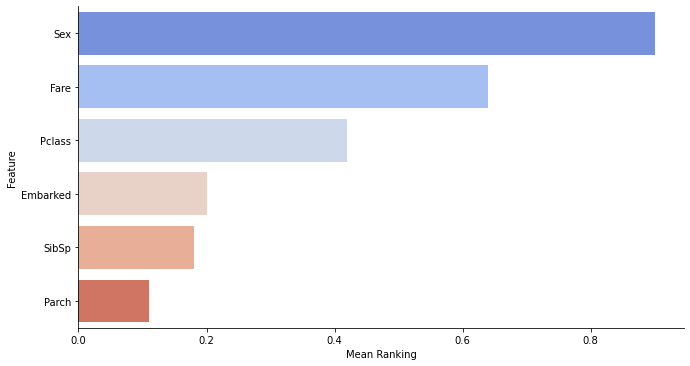

In [43]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=5, aspect=1.9, palette='coolwarm')

In [44]:
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
meanplot

,Feature,Mean Ranking
1,Sex,0.90
4,Fare,0.64
0,Pclass,0.42
5,Embarked,0.20
2,SibSp,0.18
3,Parch,0.11


In [45]:
columnName = meanplot.loc[meanplot['Mean Ranking']  >= 0.20]
columnName = list(columnName.Feature)
columnName

['Sex', 'Fare', 'Pclass', 'Embarked']

# Predictive Modeling

In [46]:
# Extract the input variable and target variable
X = trainDf[columnName]
y = trainDf[['Survived']]

testDf = testDf[columnName]


In [47]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Utility functions

In [48]:
def classifier_report(ModelName, model_object):
    model_object.fit(X_train, y_train)
    y_test_pred = model_object.predict(X_test)
    print(ModelName, "Classifier Report:")
    print("\n", metrics.classification_report(y_test, y_test_pred))
    # Compute confusion matrix
    print("\n\nConfusion_matrix: \n")
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    ax= plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells    

Logistic Regression Classifier Report:

               precision    recall  f1-score   support

           0       0.81      0.78      0.79       157
           1       0.70      0.75      0.72       111

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



Confusion_matrix: 



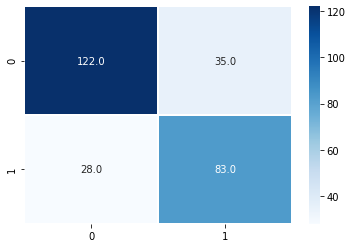

In [49]:
#Logistic Regression

lr = LogisticRegression()
classifier_report("Logistic Regression", lr)

Decision Tree Classifier Report:

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Confusion_matrix: 



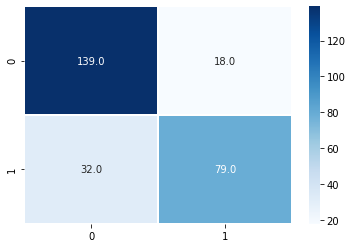

In [50]:
dt = DecisionTreeClassifier()
classifier_report("Decision Tree", dt)

Random Forest Classifier Report:

               precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.78      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Confusion_matrix: 



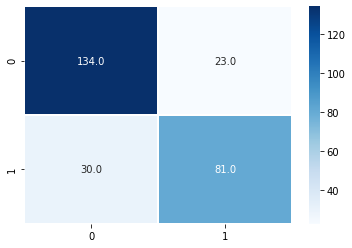

In [51]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 51)
classifier_report("Random Forest", rf)

K-Neighbors Classifier Report:

               precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.76      0.64      0.69       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



Confusion_matrix: 



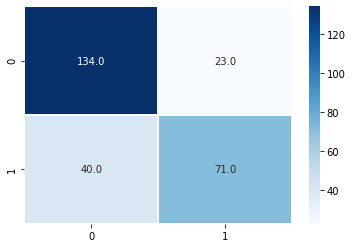

In [52]:
# K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
classifier_report("K-Neighbors", knn)

# Model selection

Decision tree model performs well compared to other models such as Logistic regression, Random forest and K-Neighbors Classifier. Random forest model has selected for further prediction and analytics.


In [90]:
submission = pd.read_csv("gender_submission.csv", index_col='PassengerId')
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [91]:
rf = DecisionTreeClassifier(random_state=41)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

In [92]:
test_survived = pd.Series(rf.predict(testDf), name = "Survived").astype(int)
test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int32


               precision    recall  f1-score   support

           0       0.87      0.92      0.90       266
           1       0.85      0.76      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



Confusion_matrix: 



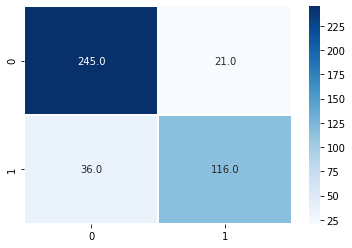

In [93]:
print("\n", metrics.classification_report(submission, test_survived))
# Compute confusion matrix
print("\n\nConfusion_matrix: \n")
cnf_matrix = metrics.confusion_matrix(submission, test_survived)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells 

In [107]:
results = pd.concat([submission, test_survived],axis = 0)
submission.to_csv("titanic.csv", index = False)

In [104]:
submission['test_survived'] = pd.Series(test_survived)

In [105]:
submission

,Survived,test_survived
PassengerId,,
892,0,NaN
893,1,NaN
894,0,NaN
895,0,NaN
896,1,NaN
...,...,...
1305,0,NaN
1306,1,NaN
1307,0,NaN


In [106]:
test_survived.to_csv("test_survived.csv", index = False)

In [98]:
type(test_survived)

pandas.core.series.Series

In [99]:
type(submission)

pandas.core.frame.DataFrame

In [88]:
len(results)

836

In [67]:
len(submission)

418

In [64]:
len(test_survived)

418

In [66]:
len(testDf)

418

In [48]:
rf = DecisionTreeClassifier(random_state=41)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(testDf)

In [49]:
y_test_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [50]:
submission = pd.read_csv("gender_submission.csv", index_col='PassengerId')
submission


               precision    recall  f1-score   support

           0       0.87      0.92      0.90       266
           1       0.85      0.76      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



Confusion_matrix: 



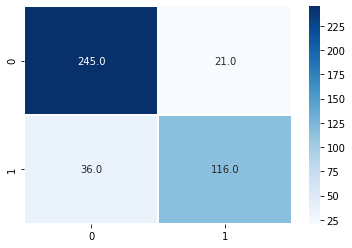

In [52]:
print("\n", metrics.classification_report(submission, y_test_pred))
# Compute confusion matrix
print("\n\nConfusion_matrix: \n")
cnf_matrix = metrics.confusion_matrix(submission, y_test_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = None, fmt= '.1f' , cmap= 'Blues', linewidths=0.5); #annot=True to annotate cells    

# Conclution: 

The results as per the Accuracy for Decision Tree is 86%.

The training set should be used to build machine learning models. The test set should be used to see how well the model performs on unseen data.

For the test set, they do not provide the ground truth for each passenger. It is the challenge to predict these outcomes. For each passenger in the test set, use the trained model to predict whether or not they survived the sinking of the Titanic.
